# Gaussian Lowpass Filter

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img_path = '/Users/jeonhyeonbin/Library/Mobile Documents/com~apple~CloudDocs/POSTECH/계산사진학/assn1/assn2/images/cat.jpg'

In [16]:
img_rgb = cv2.imread(img_path, cv2.IMREAD_COLOR).astype(np.float32)/255.       # RGB
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)/255.    # grayscale

In [14]:
def gaussian_lpf(shape, co):
    P, Q = shape
    u = np.arange(P)
    v = np.arange(Q)
    U, V = np.meshgrid(u, v, indexing='ij')
    
    u_c, v_c = P//2, Q//2
    d_square = (U - u_c)**2 + (V - v_c)**2
    
    g_lpf = np.exp(-d_square / (2 * (co**2)))
    return g_lpf

In [25]:
def gaussian_lpf_gray(img, cutoff, pad_size=10):
    M, N = img.shape
    
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_CONSTANT, value=0)

    P, Q = padded_img.shape

    f = np.fft.fft2(padded_img)     # 패딩한 이미지의 푸리에 변환
    f_s = np.fft.fftshift(f)        # 배열 변환
    
    H = gaussian_lpf((P,Q), cutoff)
    filtered_s = f_s * H
    filtered = np.fft.ifftshift(filtered_s) # 배열 원위치
    img_filtered = np.fft.ifft2(filtered)   # 역푸리에 변환
    img_real = np.real(img_filtered)
    out = img_real[pad_size:pad_size+M, pad_size:pad_size+N]
    
    return out        

In [26]:
def gaussian_lpf_rgb(img, cutoff, pad_size=10):
    b, g, r = cv2.split(img) # OpenCV는 bgr순서
    
    b_ = gaussian_lpf_gray(b, cutoff, pad_size=pad_size).astype(np.float32)
    g_ = gaussian_lpf_gray(g, cutoff, pad_size=pad_size).astype(np.float32)
    r_ = gaussian_lpf_gray(r, cutoff, pad_size=pad_size).astype(np.float32)
    
    return cv2.merge([b_, g_, r_])

In [37]:
def show_image(img, title):
    if img.ndim == 3:
        height, width, _= img.shape
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.xticks([0, width-1])
        plt.yticks([0, height-1])
        plt.title(title)
        plt.show()
    else:
        height, width = img.shape
        plt.imshow(img, cmap='gray')
        plt.xticks([0, width-1])
        plt.yticks([0, height-1])
        plt.title(title)
        plt.show()

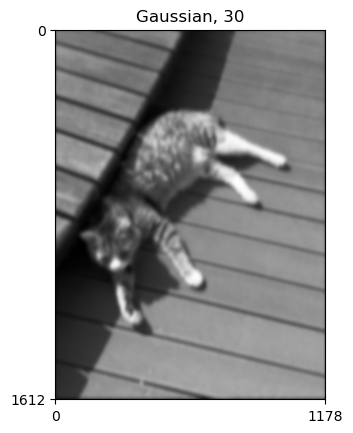

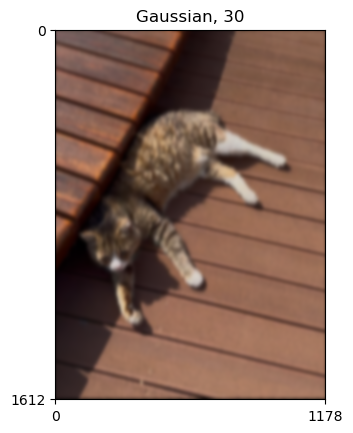

In [39]:
show_image(gaussian_lpf_gray(img_gray, 30, 15), 'Gaussian, 30')
show_image(gaussian_lpf_rgb(img_rgb, 30, 15), 'Gaussian, 30')